# Fast KMEANS example

This is an example on how to use the accelerated KMEANS function written in C and built with cython.

First let's import some libraries and the external KMEANS C extention built with Cython :

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import random
from Cfast_km import Cfast_km

Then, set the number of target clusters, number of features and number of samples:

In [64]:
nb_cluster = 5
nb_features = 2
nb_samples = 500
nb_cluster, nb_features,nb_samples

(5, 2, 500)

Randomly draw some samples and initial centroids. It is important to convert the lists to numpy arrays with 'double' type so the C function recognizes them.

In [65]:
X = [[random.random() for i in range(nb_features)] for j in range(nb_samples)]      
mu = random.sample(X, nb_cluster)
X = np.array(X, dtype="double")
mu = np.array(mu, dtype="double")
mu

array([[ 0.68041915,  0.74761999],
       [ 0.0811197 ,  0.44320711],
       [ 0.31501778,  0.73500987],
       [ 0.37550093,  0.73580536],
       [ 0.24081246,  0.71221542]])

Set the initial weights for each features at 1 (all features have the same importance).
Also we need create the labels list, which will be passed to Cfast_km function to get the cluster number for each sample

In [66]:
weights = np.array([1 for i in range(nb_features)], dtype="double")
labels = np.zeros(len(X), dtype="int")

Let's execute the Fast KMEANS functions. Results will be collected through mu (centroids) and labels (samples labels). The last argument (set as 0) is the tolerance : increasing it will stop the process in earlier steps without a full convergence, but will save some computing time.

In [67]:
Cfast_km(X , mu , labels, weights, 0)
mu, labels

(array([[ 0.78286215,  0.80200815],
        [ 0.48044075,  0.38990149],
        [ 0.79190823,  0.24074303],
        [ 0.16415785,  0.22077464],
        [ 0.2463517 ,  0.78560209]]),
 array([3, 2, 2, 3, 0, 2, 4, 4, 1, 2, 2, 0, 3, 1, 4, 2, 1, 2, 0, 2, 4, 4, 0,
        4, 4, 3, 0, 2, 2, 0, 4, 2, 1, 4, 4, 2, 1, 4, 1, 4, 4, 3, 4, 4, 1, 2,
        4, 0, 3, 1, 1, 4, 0, 0, 0, 2, 2, 2, 0, 1, 2, 1, 4, 3, 0, 1, 4, 0, 1,
        3, 4, 4, 2, 0, 0, 1, 3, 4, 0, 3, 1, 1, 3, 4, 4, 3, 4, 1, 2, 1, 1, 2,
        2, 1, 2, 2, 0, 1, 1, 3, 2, 4, 3, 3, 1, 2, 0, 1, 4, 0, 4, 1, 0, 3, 1,
        0, 1, 0, 4, 4, 3, 1, 0, 2, 4, 0, 4, 4, 0, 0, 2, 0, 3, 1, 4, 4, 1, 3,
        3, 4, 2, 3, 0, 1, 4, 3, 2, 4, 3, 4, 1, 4, 3, 0, 2, 4, 1, 2, 4, 0, 2,
        0, 0, 1, 2, 1, 2, 0, 4, 3, 4, 0, 4, 3, 0, 2, 0, 0, 1, 4, 2, 2, 0, 1,
        0, 4, 0, 3, 4, 4, 0, 0, 3, 3, 4, 3, 0, 4, 0, 2, 2, 3, 0, 4, 4, 4, 1,
        4, 1, 2, 4, 0, 0, 0, 1, 2, 1, 2, 1, 4, 2, 4, 4, 0, 1, 0, 4, 0, 4, 0,
        3, 0, 3, 2, 0, 2, 3, 4, 2, 4, 0, 0, 1, 0

Let's plot the results. We keep the first 2 features for 2D plotting

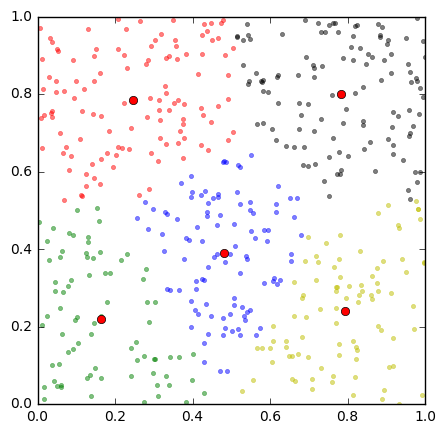

In [68]:
cmap = { 0:'k',1:'b',2:'y',3:'g',4:'r' }

fig = plt.figure(figsize=(5,5))
plt.xlim(0,1)
plt.ylim(0,1)


for i in range(nb_cluster):
    X_extract = X[labels == i]
    X1 = np.transpose(X_extract[:,0]).tolist()
    X2 = np.transpose(X_extract[:,1]).tolist()
    plt.plot(X1, X2, cmap[i%5]+'.', alpha=0.5)


mu1 = np.transpose(mu[:,0]).tolist()
mu2 = np.transpose(mu[:,1]).tolist()
plt.plot(mu1, mu2, 'ro')

plt.show()
